# Predicción regresiva Ciudad de Buenos Aires

---

<a id="toc"></a>
## Tabla de Contenidos

[Resumen](#section_resumen)

[Imports](#imports)

[Dataset y recorte](#section_dataset_y_recorte)

[Visualización exploratoria](#Visualizacion_exploratoria)

[Regresión simple](#reg_simple)

[Variables numéricas](#reg_multi)

[Variables categóricas](#agregando)

[Regresión lineal múltiple](#unificada)

[Regresión OLS](#OLS)

[Overfitting](#overfitting)

[Oportunidades de compra](#oportunidad)

[Conclusiones](#conclusion)

[Visualizaciones](#visualizaciones)



<a id="section_resumen"></a> 
## Resumen

[volver a TOC](#toc)

La siguiente notebook desarrolla un modelo de predicción regresiva múltiple, tomando los datos de properatti que corresponden únicamente a las propiedades de Ciudad de Buenos Aires con ciertos datos completos.

---

<a id="imports"></a> 
## Imports 

[volver a TOC](#toc)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

---

<a id="section_dataset_y_recorte"></a> 
## Dataset y recorte

[volver a TOC](#toc)

Del total de datos limpiados y tratados en el desafío 1, sustraemos los datos completos de Ciudad de Buenos Aires.\
Primero traigo el dataset.

In [2]:
data = pd.read_csv("../Desafío 2/data_actualizada_dos.csv")

Chequeo los detalles del set.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   Unnamed: 0.1                121220 non-null  int64  
 2   Unnamed: 0.1.1              121220 non-null  int64  
 3   operation                   121220 non-null  object 
 4   property_type               121220 non-null  object 
 5   place_name                  121197 non-null  object 
 6   place_with_parent_names     121220 non-null  object 
 7   country_name                121220 non-null  object 
 8   state_name                  121220 non-null  object 
 9   geonames_id                 102503 non-null  float64
 10  lat-lon                     69670 non-null   object 
 11  lat                         69670 non-null   float64
 12  lon                         69670 non-null   float64
 13  price         

In [4]:
data.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1 operation property_type  \
0           0             0               0      sell            PH   
1           1             1               1      sell     apartment   
2           2             2               2      sell     apartment   
3           3             3               3      sell            PH   
4           4             4               4      sell     apartment   

  place_name                            place_with_parent_names country_name  \
0  Mataderos              |Argentina|Capital Federal|Mataderos|    Argentina   
1   La Plata        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|    Argentina   
2  Mataderos              |Argentina|Capital Federal|Mataderos|    Argentina   
3    Liniers                |Argentina|Capital Federal|Liniers|    Argentina   
4     Centro  |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   

                     state_name  geonames_id  ...  antigüedad  cuota  credito  \
0               Capital Federal    3430787.0  ...       Usado      0        1   
1        Bs.As. G.B.A. Zona Sur    3432039.0  ...  A Estrenar      0        0   
2               Capital Federal    3430787.0  ...       Usado      0        0   
3               Capital Federal    3431333.0  ...       Usado      0        0   
4  Buenos Aires Costa Atlántica    3435548.0  ...       Usado      0        0   

   cochera seguridad  amenities  es_barrio_cerrado  zona_barrio_cerrado  \
0        0         0          0                  0                  NaN   
1        0         0          0                  0                  NaN   
2        0         0          0                  0                  NaN   
3        0         0          0                  0                  NaN   
4        0         0          0                  0                  NaN   

      barrio                                geometry  
0  Mataderos         POINT (-58.5088387 -34.6618237)  
1   La Plata  POINT (-57.96432950000001 -34.9038831)  
2  Mataderos         POINT (-58.5229825 -34.6522615)  
3    Liniers         POINT (-58.5164244 -34.6477969)  
4     Centro         POINT (-57.5494468 -38.0026256)  

[5 rows x 54 columns]

In [5]:
data.describe()

Unnamed: 0   Unnamed: 0.1  Unnamed: 0.1.1   geonames_id  \
count  121220.000000  121220.000000   121220.000000  1.025030e+05   
mean    60609.500000   60609.500000    60609.500000  3.574442e+06   
std     34993.344153   34993.344153    34993.344153  3.541306e+05   
min         0.000000       0.000000        0.000000  3.427208e+06   
25%     30304.750000   30304.750000    30304.750000  3.430234e+06   
50%     60609.500000   60609.500000    60609.500000  3.433910e+06   
75%     90914.250000   90914.250000    90914.250000  3.836668e+06   
max    121219.000000  121219.000000   121219.000000  6.948895e+06   

                lat           lon         price  price_aprox_local_currency  \
count  69670.000000  69670.000000  1.008100e+05                1.008100e+05   
mean     -34.626210    -59.266290  4.685259e+05                4.229397e+06   
std        1.980936      2.299922  2.260101e+06                6.904714e+06   
min      -54.823985    -75.678931  0.000000e+00                0.000000e+00   
25%      -34.669065    -58.727040  1.100000e+05                1.583309e+06   
50%      -34.597985    -58.480128  1.850000e+05                2.558452e+06   
75%      -34.441299    -58.395908  4.200000e+05                4.675792e+06   
max        4.545843    -53.733330  6.500000e+08                8.212711e+08   

       price_aprox_usd  surface_total_in_m2  ...  room_expanded          dorm  \
count     1.008100e+05         81892.000000  ...   71664.000000  37263.000000   
mean      2.397006e+05           233.795328  ...       2.921048      2.333736   
std       3.913239e+05          1782.222147  ...       1.686655      0.942580   
min       0.000000e+00             0.000000  ...       1.000000      1.000000   
25%       8.973388e+04            50.000000  ...       2.000000      2.000000   
50%       1.450000e+05            84.000000  ...       3.000000      2.000000   
75%       2.650000e+05           200.000000  ...       4.000000      3.000000   
max       4.654544e+07        200000.000000  ...      32.000000      9.000000   

       room_expanded_2    room_fixed          cuota        credito  \
count     89259.000000  89034.000000  121220.000000  121220.000000   
mean          3.015405      3.090909       0.078403       0.080935   
std           1.581283      1.565503       0.268806       0.272737   
min           1.000000      1.000000       0.000000       0.000000   
25%           2.000000      2.000000       0.000000       0.000000   
50%           3.000000      3.000000       0.000000       0.000000   
75%           4.000000      4.000000       0.000000       0.000000   
max          32.000000     32.000000       1.000000       1.000000   

             cochera      seguridad      amenities  es_barrio_cerrado  
count  121220.000000  121220.000000  121220.000000      121220.000000  
mean        0.047451       0.093763       0.091066           0.092650  
std         0.212602       0.291500       0.287704           0.289942  
min         0.000000       0.000000       0.000000           0.000000  
25%         0.000000       0.000000       0.000000           0.000000  
50%         0.000000       0.000000       0.000000           0.000000  
75%         0.000000       0.000000       0.000000           0.000000  
max         1.000000       1.000000       1.000000           1.000000  

[8 rows x 29 columns]

Ahora recortamos sólo los datos residenciales de Ciudad de Buenos Aires.

In [6]:
mask_state = data.state_name == "Capital Federal"
mask_propiedad = data.property_type != "store"
mask_caba = (mask_state) & (mask_propiedad)
caba = data[mask_caba]
print(caba.shape)

(30952, 54)


In [7]:
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30952 entries, 0 to 121219
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  30952 non-null  int64  
 1   Unnamed: 0.1                30952 non-null  int64  
 2   Unnamed: 0.1.1              30952 non-null  int64  
 3   operation                   30952 non-null  object 
 4   property_type               30952 non-null  object 
 5   place_name                  30952 non-null  object 
 6   place_with_parent_names     30952 non-null  object 
 7   country_name                30952 non-null  object 
 8   state_name                  30952 non-null  object 
 9   geonames_id                 29737 non-null  float64
 10  lat-lon                     22631 non-null  object 
 11  lat                         22631 non-null  float64
 12  lon                         22631 non-null  float64
 13  price                       27

Elimino outliers.

In [8]:
def no_outliers (group_by_list, outlier_field, data_input):
    mask_not_null = data_input[group_by_list].notnull().apply(lambda x: x.all(), axis=1)
    q3= data_input[mask_not_null].groupby(group_by_list)[outlier_field].transform(lambda x:x.quantile(0.75))
    q1= data_input[mask_not_null].groupby(group_by_list)[outlier_field].transform(lambda x:x.quantile(0.25))
    prom= data_input[mask_not_null].groupby(group_by_list)[outlier_field].transform(lambda x:x.mean())

    iqr=q3-q1

    outlier_top = q3 + iqr*1.5
    outlier_bottom = q1 - iqr*1.5

    
    df_outliers = pd.DataFrame({outlier_field:data_input[outlier_field],'outlier_top':outlier_top,'outlier_bottom':outlier_bottom})
    not_outlier = df_outliers.apply(lambda x: False if (x[outlier_field]>x.outlier_top) | (x[outlier_field]<x.outlier_bottom )else True, axis=1)
    return not_outlier

In [9]:
def clean_dataset(outlier_fields_list,groupby_outliers,dropna_fields_list, dataset):
    shape=[]
    shape.append(dataset.shape[0])
    for i in outlier_fields_list:
        mask_no_outliers=no_outliers(groupby_outliers,i,dataset)
        dataset=dataset[mask_no_outliers]
        shape.append(dataset.shape[0])
    data_clean=dataset.dropna(subset=dropna_fields_list)
    shape.append(data_clean.shape[0])
    print (shape)
    return data_clean

In [10]:
data_clean = clean_dataset(['surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2'],
              ['property_type','split_Zona'],
             ['price_usd_per_m2','surface_covered_in_m2', "barrio"],
             caba)

[30952, 28884, 27532, 26040, 17123]


In [11]:
clean_dos = clean_dataset(['surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2'],
              ['property_type','split_Zona'],
             ['price_usd_per_m2','surface_covered_in_m2', "room_fixed", "barrio"],
             caba)

[30952, 28884, 27532, 26040, 14670]


Miro como me quedaron los valores máximos y mínimos.

In [12]:
a = data_clean.sort_values(by = "price_usd_per_m2", ascending = False)
a[["price_usd_per_m2", "barrio"]].head(10)

price_usd_per_m2    barrio
32773             4500.0   Palermo
18020             4500.0   Almagro
114045            4500.0  Recoleta
38405             4500.0  Recoleta
48894             4500.0  Recoleta
14085             4500.0  Recoleta
74138             4500.0  Belgrano
70056             4500.0   Palermo
61997             4500.0  Recoleta
38445             4500.0     Nuñez

In [13]:
data_clean["price_usd_per_m2"].describe()

count    17123.000000
mean      2414.876426
std        707.815174
min        120.964706
25%       1964.285714
50%       2386.961538
75%       2845.032841
max       4500.000000
Name: price_usd_per_m2, dtype: float64

In [14]:
data_clean.describe()

Unnamed: 0   Unnamed: 0.1  Unnamed: 0.1.1   geonames_id  \
count   17123.000000   17123.000000    17123.000000  1.641600e+04   
mean    63306.302108   63306.302108    63306.302108  3.529982e+06   
std     32998.651507   32998.651507    32998.651507  5.554624e+05   
min         0.000000       0.000000        0.000000  3.427366e+06   
25%     36682.500000   36682.500000    36682.500000  3.429595e+06   
50%     63981.000000   63981.000000    63981.000000  3.433775e+06   
75%     88679.000000   88679.000000    88679.000000  3.435874e+06   
max    121217.000000  121217.000000   121217.000000  6.693230e+06   

                lat           lon         price  price_aprox_local_currency  \
count  13217.000000  13217.000000  1.712300e+04                1.712300e+04   
mean     -34.601138    -58.439039  2.798809e+05                2.883099e+06   
std        0.026571      0.038522  6.127562e+05                1.871161e+06   
min      -34.694051    -58.544722  2.200000e+04                1.088524e+05   
25%      -34.621184    -58.466787  1.000000e+05                1.711516e+06   
50%      -34.602208    -58.440114  1.400000e+05                2.371421e+06   
75%      -34.581654    -58.409375  2.190000e+05                3.440678e+06   
max      -34.535096    -58.354956  1.013701e+07                2.911342e+07   

       price_aprox_usd  surface_total_in_m2  ...  room_expanded         dorm  \
count     1.712300e+04         17123.000000  ...   14323.000000  2075.000000   
mean      1.633993e+05            74.335806  ...       2.418697     2.345542   
std       1.060478e+05            66.106068  ...       1.151008     0.860929   
min       6.169200e+03            12.000000  ...       1.000000     1.000000   
25%       9.700000e+04            41.000000  ...       1.000000     2.000000   
50%       1.344000e+05            55.000000  ...       2.000000     2.000000   
75%       1.950000e+05            83.000000  ...       3.000000     3.000000   
max       1.650000e+06          1045.000000  ...      10.000000     8.000000   

       room_expanded_2    room_fixed         cuota       credito  \
count     14684.000000  14670.000000  17123.000000  17123.000000   
mean          2.450218      2.493047      0.085966      0.116393   
std           1.165189      1.173909      0.280322      0.320705   
min           1.000000      1.000000      0.000000      0.000000   
25%           1.000000      2.000000      0.000000      0.000000   
50%           2.000000      2.000000      0.000000      0.000000   
75%           3.000000      3.000000      0.000000      0.000000   
max          10.000000     10.000000      1.000000      1.000000   

            cochera     seguridad     amenities  es_barrio_cerrado  
count  17123.000000  17123.000000  17123.000000       17123.000000  
mean       0.045728      0.111896      0.188752           0.010279  
std        0.208901      0.315248      0.391323           0.100864  
min        0.000000      0.000000      0.000000           0.000000  
25%        0.000000      0.000000      0.000000           0.000000  
50%        0.000000      0.000000      0.000000           0.000000  
75%        0.000000      0.000000      0.000000           0.000000  
max        1.000000      1.000000      1.000000           1.000000  

[8 rows x 29 columns]

Comparo antes y después del outlier.

In [15]:
def plot_boxplot(data, y, x, nombre_y, nombre_x, titulo):
    sns.boxplot(y=y, x=x, data=data)
    plt.xticks(rotation=90)
    plt.ylabel(nombre_y)
    plt.xlabel(nombre_x)
    plt.title(titulo)
    fig = plt.gcf()
    fig.set_size_inches(13, 10)
    return

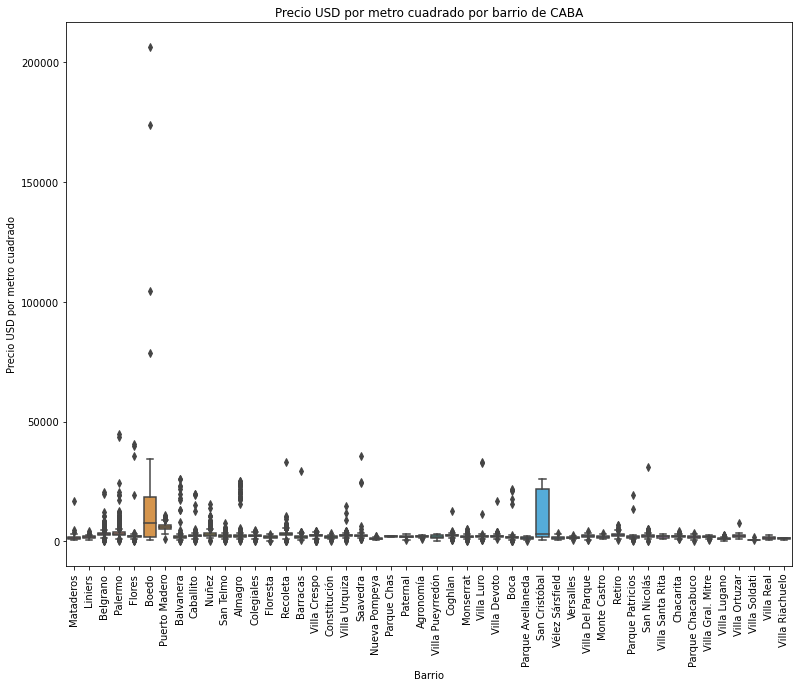

In [16]:
plot_boxplot(caba, caba.price_usd_per_m2, caba.barrio, "Precio USD por metro cuadrado","Barrio", "Precio USD por metro cuadrado por barrio de CABA")

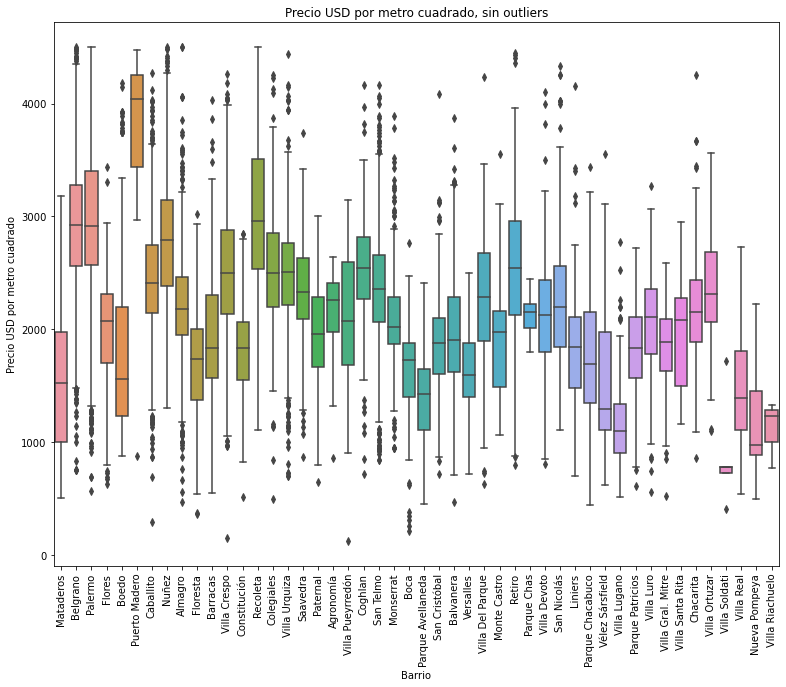

In [17]:
plot_boxplot(data_clean, data_clean.price_usd_per_m2, data_clean.barrio, "Precio USD por metro cuadrado", "Barrio", "Precio USD por metro cuadrado, sin outliers")

<a id="Visualizacion_exploratoria"></a> 
## Visualización exploratoria

[volver a TOC](#toc)

Con los recortes hechos, visualizamos algunas features posibles para el modelo regresivo.\
Primero veamos la matriz de correlación del set.

In [18]:
data_clean.corr()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  \
Unnamed: 0                    1.000000      1.000000        1.000000   
Unnamed: 0.1                  1.000000      1.000000        1.000000   
Unnamed: 0.1.1                1.000000      1.000000        1.000000   
geonames_id                  -0.031951     -0.031951       -0.031951   
lat                           0.081048      0.081048        0.081048   
lon                          -0.031682     -0.031682       -0.031682   
price                         0.117934      0.117934        0.117934   
price_aprox_local_currency   -0.015941     -0.015941       -0.015941   
price_aprox_usd              -0.015941     -0.015941       -0.015941   
surface_total_in_m2          -0.081256     -0.081256       -0.081256   
surface_covered_in_m2        -0.083972     -0.083972       -0.083972   
price_usd_per_m2              0.123584      0.123584        0.123584   
price_per_m2                  0.116847      0.116847        0.116847   
floor                         0.015719      0.015719        0.015719   
rooms                         0.021291      0.021291        0.021291   
expenses                     -0.014151     -0.014151       -0.014151   
mono_desc                          NaN           NaN             NaN   
amb_text_desc                 0.024383      0.024383        0.024383   
amb_num_desc                 -0.001020     -0.001020       -0.001020   
room_expanded                 0.016634      0.016634        0.016634   
dorm                         -0.045547     -0.045547       -0.045547   
room_expanded_2               0.021777      0.021777        0.021777   
room_fixed                    0.007758      0.007758        0.007758   
cuota                        -0.016226     -0.016226       -0.016226   
credito                      -0.024760     -0.024760       -0.024760   
cochera                       0.012156      0.012156        0.012156   
seguridad                     0.050669      0.050669        0.050669   
amenities                     0.091701      0.091701        0.091701   
es_barrio_cerrado             0.065706      0.065706        0.065706   

                            geonames_id       lat       lon     price  \
Unnamed: 0                    -0.031951  0.081048 -0.031682  0.117934   
Unnamed: 0.1                  -0.031951  0.081048 -0.031682  0.117934   
Unnamed: 0.1.1                -0.031951  0.081048 -0.031682  0.117934   
geonames_id                    1.000000 -0.054046  0.177487 -0.040578   
lat                           -0.054046  1.000000 -0.129929  0.093597   
lon                            0.177487 -0.129929  1.000000 -0.007019   
price                         -0.040578  0.093597 -0.007019  1.000000   
price_aprox_local_currency    -0.058466  0.186674 -0.049928  0.220153   
price_aprox_usd               -0.058466  0.186674 -0.049928  0.220153   
surface_total_in_m2           -0.011461 -0.074510 -0.112830  0.107074   
surface_covered_in_m2         -0.005142 -0.067619 -0.083436  0.104527   
price_usd_per_m2              -0.100576  0.467658  0.122323  0.127419   
price_per_m2                  -0.019624  0.057265  0.007803  0.697963   
floor                          0.027299 -0.061330  0.074926  0.010360   
rooms                          0.037556 -0.073214 -0.057175  0.104928   
expenses                      -0.004332 -0.037594 -0.048413  0.000063   
mono_desc                           NaN       NaN       NaN       NaN   
amb_text_desc                  0.011998 -0.013065 -0.026010  0.233160   
amb_num_desc                   0.012659 -0.062669 -0.057349  0.083681   
room_expanded                  0.026187 -0.083004 -0.064879  0.099660   
dorm                          -0.013294 -0.052715 -0.058768  0.154255   
room_expanded_2                0.023545 -0.080483 -0.071085  0.104389   
room_fixed                     0.021371 -0.080467 -0.066448  0.104274   
cuota                         -0.042072 -0.023659 -0.010612  0.034876   
credito                        0.038885 -0

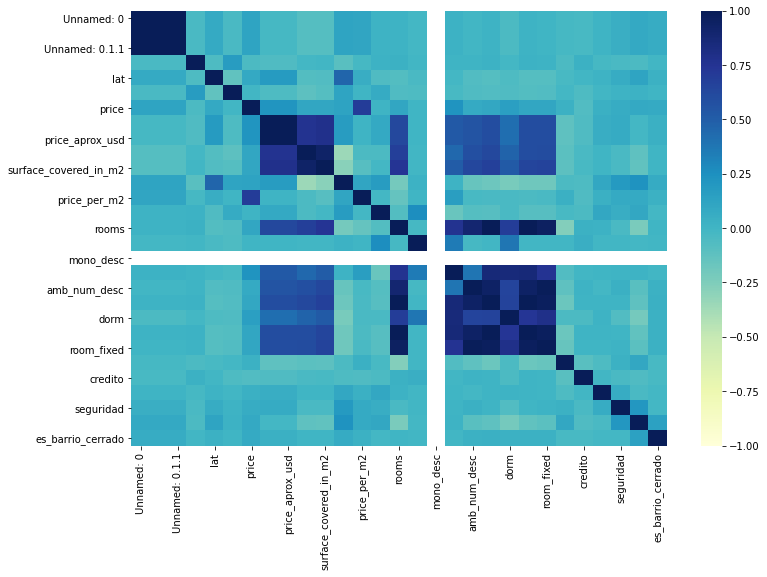

In [19]:
fig = plt.gcf()
sns.heatmap(data_clean.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu")
fig.set_size_inches(12, 8)

Lo pasamos a un heatmap con las features que consideramos más importantes.

In [20]:
data_clean.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'operation',
       'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'residecial_comercial',
       'split_Pais', 'split_Region', 'split_Provincia', 'split_Zona',
       'split_Ciudad', 'split_Barrios_CABA', 'split_Otros_datos_Zona',
       'mono_desc', 'amb_text_desc', 'amb_num_desc', 'room_expanded', 'dorm',
       'room_expanded_2', 'room_cat', 'room_fixed', 'antigüedad', 'cuota',
       'credito', 'cochera', 'seguridad', 'amenities', 'es_barrio_cerrado',
       'zona_barrio_cerrado', 'barrio', 'geometry'],
      dtype='object')

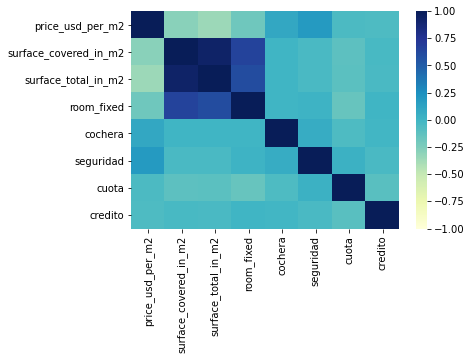

In [21]:
feature_cols = ["price_usd_per_m2", "surface_covered_in_m2", "surface_total_in_m2", "room_fixed", "cochera", "seguridad", "antigüedad", "cuota", "credito"]
sns.heatmap(data_clean[feature_cols].corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

In [22]:
matriz = data_clean[feature_cols].corr()
matriz

price_usd_per_m2  surface_covered_in_m2  \
price_usd_per_m2               1.000000              -0.285447   
surface_covered_in_m2         -0.285447               1.000000   
surface_total_in_m2           -0.344371               0.931145   
room_fixed                    -0.185958               0.658910   
cochera                        0.097827               0.003029   
seguridad                      0.191470              -0.033992   
cuota                         -0.041251              -0.112797   
credito                       -0.053680              -0.029452   

                       surface_total_in_m2  room_fixed   cochera  seguridad  \
price_usd_per_m2                 -0.344371   -0.185958  0.097827   0.191470   
surface_covered_in_m2             0.931145    0.658910  0.003029  -0.033992   
surface_total_in_m2               1.000000    0.607261  0.000313  -0.031269   
room_fixed                        0.607261    1.000000  0.005970   0.016640   
cochera                           0.000313    0.005970  1.000000   0.063308   
seguridad                        -0.031269    0.016640  0.063308   1.000000   
cuota                            -0.106759   -0.155505 -0.053170   0.035218   
credito                          -0.031896    0.006016 -0.000990  -0.032355   

                          cuota   credito  
price_usd_per_m2      -0.041251 -0.053680  
surface_covered_in_m2 -0.112797 -0.029452  
surface_total_in_m2   -0.106759 -0.031896  
room_fixed            -0.155505  0.006016  
cochera               -0.053170 -0.000990  
seguridad              0.035218 -0.032355  
cuota                  1.000000 -0.098313  
credito               -0.098313  1.000000

In [23]:
matriz_target = matriz["price_usd_per_m2"].abs().sort_values(ascending = False)
matriz_target

price_usd_per_m2         1.000000
surface_total_in_m2      0.344371
surface_covered_in_m2    0.285447
seguridad                0.191470
room_fixed               0.185958
cochera                  0.097827
credito                  0.053680
cuota                    0.041251
Name: price_usd_per_m2, dtype: float64

In [24]:
data_clean.isnull().sum()

Unnamed: 0                        0
Unnamed: 0.1                      0
Unnamed: 0.1.1                    0
operation                         0
property_type                     0
place_name                        0
place_with_parent_names           0
country_name                      0
state_name                        0
geonames_id                     707
lat-lon                        3906
lat                            3906
lon                            3906
price                             0
currency                          0
price_aprox_local_currency        0
price_aprox_usd                   0
surface_total_in_m2               0
surface_covered_in_m2             0
price_usd_per_m2                  0
price_per_m2                      2
floor                         15943
rooms                          9242
expenses                      12637
properati_url                     0
description                       0
title                             0
image_thumbnail             

Vemos que la tercera feature con mayor correlación es "room_fixed". En su momento, para evitar perder 2.500 datos, no eliminamos los nulos de esa categoría.\
Vamos a probar qué sucede si sacamos esos nulos. Repetimos la visualización usando "clean_dos".

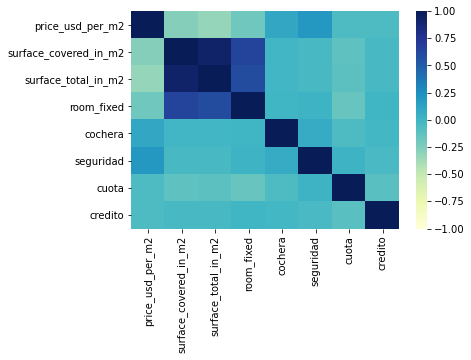

In [25]:
feature_cols = ["price_usd_per_m2", "surface_covered_in_m2", "surface_total_in_m2", "room_fixed", "cochera", "seguridad", "antigüedad", "cuota", "credito"]
sns.heatmap(clean_dos[feature_cols].corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

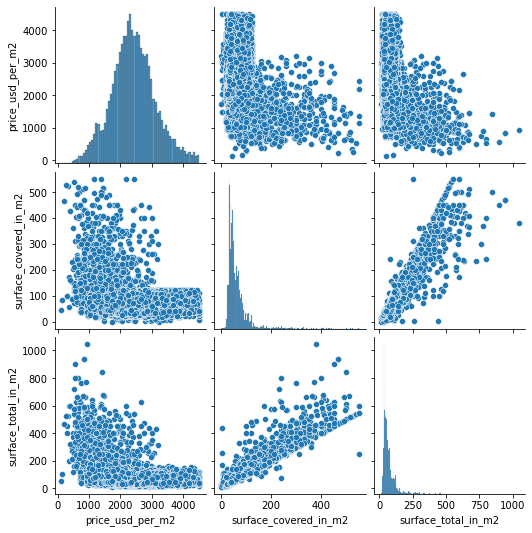

In [26]:
sns.pairplot(data=data_clean[["price_usd_per_m2", "surface_covered_in_m2", "surface_total_in_m2"]])

In [27]:
matriz_dos = clean_dos[feature_cols].corr()
matriz_dos

price_usd_per_m2  surface_covered_in_m2  \
price_usd_per_m2               1.000000              -0.267239   
surface_covered_in_m2         -0.267239               1.000000   
surface_total_in_m2           -0.327028               0.929543   
room_fixed                    -0.185958               0.658910   
cochera                        0.105884              -0.000606   
seguridad                      0.202349              -0.030188   
cuota                         -0.054420              -0.120519   
credito                       -0.054397              -0.028609   

                       surface_total_in_m2  room_fixed   cochera  seguridad  \
price_usd_per_m2                 -0.327028   -0.185958  0.105884   0.202349   
surface_covered_in_m2             0.929543    0.658910 -0.000606  -0.030188   
surface_total_in_m2               1.000000    0.607261 -0.000923  -0.025534   
room_fixed                        0.607261    1.000000  0.005970   0.016640   
cochera                          -0.000923    0.005970  1.000000   0.070407   
seguridad                        -0.025534    0.016640  0.070407   1.000000   
cuota                            -0.110932   -0.155505 -0.051801   0.022862   
credito                          -0.030509    0.006016 -0.009881  -0.036608   

                          cuota   credito  
price_usd_per_m2      -0.054420 -0.054397  
surface_covered_in_m2 -0.120519 -0.028609  
surface_total_in_m2   -0.110932 -0.030509  
room_fixed            -0.155505  0.006016  
cochera               -0.051801 -0.009881  
seguridad              0.022862 -0.036608  
cuota                  1.000000 -0.099918  
credito               -0.099918  1.000000

In [28]:
matriz_target_dos = matriz_dos["price_usd_per_m2"].abs().sort_values(ascending = False)
matriz_target_dos

price_usd_per_m2         1.000000
surface_total_in_m2      0.327028
surface_covered_in_m2    0.267239
seguridad                0.202349
room_fixed               0.185958
cochera                  0.105884
cuota                    0.054420
credito                  0.054397
Name: price_usd_per_m2, dtype: float64

<a id="reg_simple"></a> 
## Regresión simple

[volver a TOC](#toc)

Vamos a hacer un primer modelo probando la regresión entre la superficie total en metros cuadrados y nuestra variable target: precio USD por metro cuadrado.\
Se van a seguir los siguientes pasos:
1) Preparar los datos en una matriz de features y un array target.

2) Elegir una clase de modelo importando la clase de estimador apropiado de Scikit-Learn.

3) Seleccionar los hiperparámetros del modelo instanciando la clase con los valores deseados

4) Ajustar el modelo a los datos invocando el método** fit()** de la instancia del modelo.

5) Aplicar el modelo a nuevos datos.


In [29]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

Defino mis variables independiente y dependiente.

In [30]:
X = data_clean.price_usd_per_m2.values.reshape(-1,1)
y = data_clean.surface_total_in_m2.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y) 
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print(X.shape)
print(y.shape)
print(y_pred.shape)
print ('R2:', metrics.r2_score(y_test, y_pred))

(17123, 1)
(17123, 1)
(4281, 1)
R2: 0.13466642963304154


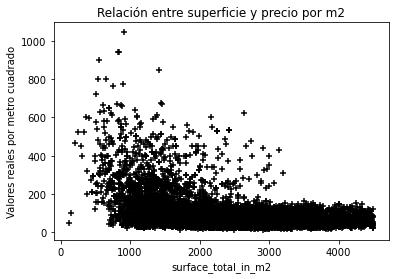

In [33]:
plt.scatter(X, y, s=30, c='black', marker='+', zorder=10)
plt.xlabel("surface_total_in_m2")
plt.ylabel("Valores reales por metro cuadrado")
plt.title('Relación entre superficie y precio por m2')
plt.show()


<a id="reg_multi"></a> 
## Variables numéricas

[volver a TOC](#toc)

Ahora hacemos un segundo modelo agregando features con las que ya contamos. Incluímos las variables numéricas, como superficie total, y las dummies preexistentes, como cochera o seguridad. 

In [34]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

def train_test_rmse(feature_cols, data):
    X = data[feature_cols]
    y = data.price_usd_per_m2
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_sc=pd.DataFrame(scaler.transform(X_train),index=X_train.index.values, columns=X_train.columns.values)
    
    linreg = LinearRegression(fit_intercept = True)
    linreg.fit(X_train_sc, y_train)
    
    X_test_sc =pd.DataFrame(scaler.transform(X_test),index=X_test.index.values, columns=X_test.columns.values)
    y_pred = linreg.predict(X_test_sc)   
    
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))

Pruebo la función tomando las variables con mayor correlación encontrada. Las agregamos según su fuerza correlacional ordenadas en la variable "matriz_target"

In [35]:
matriz_target

price_usd_per_m2         1.000000
surface_total_in_m2      0.344371
surface_covered_in_m2    0.285447
seguridad                0.191470
room_fixed               0.185958
cochera                  0.097827
credito                  0.053680
cuota                    0.041251
Name: price_usd_per_m2, dtype: float64

In [36]:
print("Con superficie total")
a = train_test_rmse(['surface_total_in_m2'], data_clean)
print(a)
print("-------")

print("Con superficie total y cubierta")
b = train_test_rmse(['surface_total_in_m2', 'surface_covered_in_m2'], data_clean)
print(b)
print("-------")

print("Con superficie total, cubierta y seguridad")
d = train_test_rmse(['surface_total_in_m2', 'surface_covered_in_m2', "seguridad"], data_clean)
print(d)
print("-------")

print("Con superficie total, cubierta, seguridad y cochera")
e = train_test_rmse(['surface_total_in_m2', 'surface_covered_in_m2', "seguridad", "cochera"], data_clean)
print(e)

Con superficie total
MAE: 526.4918007880815
MSE: 441738.29385012144
RMSE: 664.6339547827221
R2: 0.12096382155364782
None
-------
Con superficie total y cubierta
MAE: 521.9777035440003
MSE: 436428.56657686183
RMSE: 660.6274037434882
R2: 0.1315299020494043
None
-------
Con superficie total, cubierta y seguridad
MAE: 512.239233873596
MSE: 414745.20172917756
RMSE: 644.0071441600454
R2: 0.174678667816208
None
-------
Con superficie total, cubierta, seguridad y cochera
MAE: 509.42009282476545
MSE: 412529.6863512028
RMSE: 642.2847393105357
R2: 0.17908742793109356
None


Vamos a incorporar la feature "room_fixed", que nos indica la cantidad de habitacines, haciendo la predicción sobre el set "clean_dos".

In [37]:
matriz_target_dos

price_usd_per_m2         1.000000
surface_total_in_m2      0.327028
surface_covered_in_m2    0.267239
seguridad                0.202349
room_fixed               0.185958
cochera                  0.105884
cuota                    0.054420
credito                  0.054397
Name: price_usd_per_m2, dtype: float64

In [38]:
print("Con superficie total")
a = train_test_rmse(['surface_total_in_m2'], clean_dos)
print(a)
print("-------")

print("Con superficie total y cubierta")
b = train_test_rmse(['surface_total_in_m2', 'surface_covered_in_m2'], clean_dos)
print(b)
print("-------")

print("Con superficie total y cubierta, y habitaciones")
c = train_test_rmse(['surface_total_in_m2', 'surface_covered_in_m2','room_fixed'], clean_dos)
print(c)
print("-------")

print("Con superficie total, cubierta, habitaciones y seguridad")
d = train_test_rmse(['surface_total_in_m2', 'surface_covered_in_m2', 'room_fixed', "seguridad"], clean_dos)
print(d)
print("-------")

print("Con superficie total, cubierta, habitaciones, seguridad y cochera")
e = train_test_rmse(['surface_total_in_m2', 'surface_covered_in_m2','room_fixed', "seguridad", "cochera"], clean_dos)
print(e)

Con superficie total
MAE: 525.4496981899434
MSE: 446049.0467451675
RMSE: 667.8690341265775
R2: 0.10015775339037292
None
-------
Con superficie total y cubierta
MAE: 522.9883918267167
MSE: 444234.98240938946
RMSE: 666.5095516265236
R2: 0.10381737723513251
None
-------
Con superficie total y cubierta, y habitaciones
MAE: 523.1942090434246
MSE: 444142.7824530205
RMSE: 666.4403817694576
R2: 0.10400337789241842
None
-------
Con superficie total, cubierta, habitaciones y seguridad
MAE: 516.4663915365322
MSE: 427036.0988782824
RMSE: 653.4799911843379
R2: 0.13851374551288043
None
-------
Con superficie total, cubierta, habitaciones, seguridad y cochera
MAE: 511.0931567036526
MSE: 421856.9461785148
RMSE: 649.5051548513798
R2: 0.1489619696149168
None


Primera conclusión: es mejor dejar fuera la feature "room_fixed" porque al perder 2.500 datos, cae la calidad de predicción del modelo. Las mejores opciones parecen ser la D o E del modelo basado en "data_clean".
R2 aproximado en ambos: 0.185

<a id="agregando"></a> 
## Variables categóricas

[volver a TOC](#toc)

Teniendo una base de la regresión múltiple que mejor nos resultó, probemos ahora usar las columnas con variables categórticas, trasnformándolas a dummies para poder incorporarlas al modelo.

In [39]:
data_clean.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'operation',
       'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'residecial_comercial',
       'split_Pais', 'split_Region', 'split_Provincia', 'split_Zona',
       'split_Ciudad', 'split_Barrios_CABA', 'split_Otros_datos_Zona',
       'mono_desc', 'amb_text_desc', 'amb_num_desc', 'room_expanded', 'dorm',
       'room_expanded_2', 'room_cat', 'room_fixed', 'antigüedad', 'cuota',
       'credito', 'cochera', 'seguridad', 'amenities', 'es_barrio_cerrado',
       'zona_barrio_cerrado', 'barrio', 'geometry'],
      dtype='object')

Variables que podemos pasar a dummies: 'property_type', 'barrio'

1) Tipo de propiedad

In [40]:
data_clean.property_type.value_counts()

apartment    15159
PH            1099
house          865
Name: property_type, dtype: int64

Pasamos "property_type" a dummies.

In [41]:
type_dummies = pd.get_dummies(data_clean.property_type, drop_first = True, prefix = "Type_")
type_dummies

Type__apartment  Type__house
0                     0            0
2                     1            0
7                     1            0
8                     1            0
13                    1            0
...                 ...          ...
121147                0            1
121153                1            0
121157                1            0
121158                1            0
121217                1            0

[17123 rows x 2 columns]

In [42]:
data_clean_type = pd.concat([data_clean, type_dummies], axis=1)
data_clean_type[["Type__apartment", "Type__house" ]].sample(10)

Type__apartment  Type__house
24999                 1            0
72460                 1            0
12987                 0            1
75664                 1            0
62825                 1            0
100184                1            0
81249                 0            1
28885                 1            0
74823                 1            0
25129                 1            0

Analizamos la correlación entre los tipos de propiedad y el precio por metro cuadrado en USD.

In [43]:
data_clean_type[["price_usd_per_m2","Type__apartment", "Type__house"]].corr()

price_usd_per_m2  Type__apartment  Type__house
price_usd_per_m2          1.000000         0.409526    -0.301348
Type__apartment           0.409526         1.000000    -0.640824
Type__house              -0.301348        -0.640824     1.000000

Miramos cuánta predicción nos agrega esta feature.

In [44]:
print("Con tipo de propiedad")
a = train_test_rmse(["Type__apartment", "Type__house"], data_clean_type)
print(a)
print("-------")

print("Con superficie total, cubierta, cochera y seguridad")
b = train_test_rmse(['surface_total_in_m2', 'surface_covered_in_m2', "seguridad", "cochera"], data_clean_type)
print(b)
print("-------")

print("Con superficie total, cubierta, cochera, seguridad y tipo de propiedad")
c = train_test_rmse(['surface_total_in_m2', 'surface_covered_in_m2', "seguridad", "cochera", "Type__apartment", "Type__house"], data_clean_type)
print(c)

Con tipo de propiedad
MAE: 502.5643465843974
MSE: 406565.290261264
RMSE: 637.6247252587245
R2: 0.19095626524638198
None
-------
Con superficie total, cubierta, cochera y seguridad
MAE: 509.42009282476545
MSE: 412529.6863512028
RMSE: 642.2847393105357
R2: 0.17908742793109356
None
-------
Con superficie total, cubierta, cochera, seguridad y tipo de propiedad
MAE: 485.5732997816306
MSE: 378730.26043539064
RMSE: 615.4106437456137
R2: 0.2463465236544018
None


Vemos que el R2 da un mejor resultado agregando el tipo de propiedad como variable.

2) Barrio

Pasamos "barrio" a dummies.

In [45]:
type_barrios = pd.get_dummies(data_clean.barrio, drop_first = True)
type_barrios

Almagro  Balvanera  Barracas  Belgrano  Boca  Boedo  Caballito  \
0             0          0         0         0     0      0          0   
2             0          0         0         0     0      0          0   
7             0          0         0         1     0      0          0   
8             0          0         0         1     0      0          0   
13            0          0         0         0     0      0          0   
...         ...        ...       ...       ...   ...    ...        ...   
121147        0          0         0         1     0      0          0   
121153        0          0         0         0     0      0          0   
121157        0          0         0         1     0      0          0   
121158        0          0         0         0     0      0          0   
121217        0          0         0         0     0      0          0   

        Chacarita  Coghlan  Colegiales  ...  Villa Lugano  Villa Luro  \
0               0        0           0  ...             0           0   
2               0        0           0  ...             0           0   
7               0        0           0  ...             0           0   
8               0        0           0  ...             0           0   
13              0        0           0  ...             0           0   
...           ...      ...         ...  ...           ...         ...   
121147          0        0           0  ...             0           0   
121153          0        0           0  ...             0           0   
121157          0        0           0  ...             0           0   
121158          0        0           0  ...             0           0   
121217          0        0           0  ...             0           0   

        Villa Ortuzar  Villa Pueyrredón  Villa Real  Villa Riachuelo  \
0                   0                 0           0                0   
2                   0                 0           0                0   
7                   0                 0           0                0   
8                   0                 0           0                0   
13                  0                 0           0                0   
...               ...               ...         ...              ...   
121147              0                 0           0                0   
121153              0                 0           0                0   
121157              0                 0           0                0   
121158              0                 0           0                0   
121217              0                 0           0                0   

        Villa Santa Rita  Villa Soldati  Villa Urquiza  Vélez Sársfield  
0                      0              0              0                0  
2                      0              0              0                0  
7                      0              0              0                0  
8                      0              0              0                0  
13                     0              0              0                0  
...                  ...            ...            ...              ...  
121147                 0              0              0                0  
121153                 0              0              0                0  
121157                 0              0              0                0  
121158                 0              0              0                0  
121217                 0              0              1                0  

[17123 rows x 47 columns]

In [46]:
type_barrios.columns.size

47

In [47]:
lista_barrios = type_barrios.columns.to_list()

In [48]:
data_clean_barrios = pd.concat([data_clean, type_barrios], axis=1)
data_clean_barrios[lista_barrios].sample(10)

Almagro  Balvanera  Barracas  Belgrano  Boca  Boedo  Caballito  \
55239         0          0         0         0     0      0          0   
66715         0          0         0         1     0      0          0   
11023         0          0         0         0     0      0          0   
37237         0          0         0         0     0      0          0   
5352          1          0         0         0     0      0          0   
7960          0          0         0         0     0      0          0   
93346         0          0         0         0     0      0          0   
78763         0          0         0         0     0      0          0   
120422        0          0         0         0     0      0          0   
37753         1          0         0         0     0      0          0   

        Chacarita  Coghlan  Colegiales  ...  Villa Lugano  Villa Luro  \
55239           0        0           0  ...             0           0   
66715           0        0           0  ...             0           0   
11023           0        0           0  ...             0           0   
37237           0        0           0  ...             0           0   
5352            0        0           0  ...             0           0   
7960            0        0           0  ...             0           0   
93346           0        0           0  ...             0           0   
78763           0        0           0  ...             0           0   
120422          0        0           0  ...             0           0   
37753           0        0           0  ...             0           0   

        Villa Ortuzar  Villa Pueyrredón  Villa Real  Villa Riachuelo  \
55239               0                 1           0                0   
66715               0                 0           0                0   
11023               0                 0           0                0   
37237               0                 0           0                0   
5352                0                 0           0                0   
7960                0                 0           0                0   
93346               0                 0           0                0   
78763               0                 0           0                0   
120422              0                 0           0                0   
37753               0                 0           0                0   

        Villa Santa Rita  Villa Soldati  Villa Urquiza  Vélez Sársfield  
55239                  0              0              0                0  
66715                  0              0              0                0  
11023                  0              0              0                0  
37237                  0              0              0                0  
5352                   0              0              0                0  
7960                   0              0              0                0  
93346                  0              0              0                0  
78763                  0              0              0                0  
120422                 0              0              0                0  
37753                  0              0              0                0  

[10 rows x 47 columns]

Miramos cuánta predicción nos agrega esta feature.

In [49]:
print("Con barrios")
a = train_test_rmse(['Almagro', 'Balvanera', 'Barracas', 'Belgrano', 'Boca', 'Boedo','Caballito', 'Chacarita', 'Coghlan', 'Colegiales',\
                     'Constitución', 'Flores', 'Floresta', 'Liniers', 'Mataderos', 'Monserrat','Monte Castro', 'Nueva Pompeya', 'Nuñez',\
                     'Palermo', 'Parque Avellaneda', 'Parque Chacabuco', 'Parque Chas','Parque Patricios', 'Paternal', 'Puerto Madero',\
                     'Recoleta', 'Retiro', 'Saavedra', 'San Cristóbal', 'San Nicolás', 'San Telmo', 'Versalles', 'Villa Crespo',\
                     'Villa Del Parque', 'Villa Devoto', 'Villa Gral. Mitre','Villa Lugano', 'Villa Luro', 'Villa Ortuzar',\
                     'Villa Pueyrredón', 'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati','Villa Urquiza',\
                     'Vélez Sársfield'], data_clean_barrios)
print(a)
print("-------")

print("Con superficie total, cubierta, cochera y seguridad")
b = train_test_rmse(['surface_total_in_m2', 'surface_covered_in_m2', "seguridad", "cochera"], data_clean_barrios)
print(b)
print("-------")

print("Con superficie total, cubierta, cochera, seguridad y barrios")
c = train_test_rmse(['Almagro', 'Balvanera', 'Barracas', 'Belgrano', 'Boca', 'Boedo','Caballito', 'Chacarita', 'Coghlan', 'Colegiales',\
                     'Constitución', 'Flores', 'Floresta', 'Liniers', 'Mataderos', 'Monserrat','Monte Castro', 'Nueva Pompeya', 'Nuñez',\
                     'Palermo', 'Parque Avellaneda', 'Parque Chacabuco', 'Parque Chas','Parque Patricios', 'Paternal', 'Puerto Madero',\
                     'Recoleta', 'Retiro', 'Saavedra', 'San Cristóbal', 'San Nicolás', 'San Telmo', 'Versalles', 'Villa Crespo',\
                     'Villa Del Parque', 'Villa Devoto', 'Villa Gral. Mitre','Villa Lugano', 'Villa Luro', 'Villa Ortuzar',\
                     'Villa Pueyrredón', 'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati','Villa Urquiza',\
                     'Vélez Sársfield', 'surface_total_in_m2','surface_covered_in_m2', "cochera", "seguridad" ], data_clean_barrios)
print(c)

Con barrios
MAE: 432.7221011957661
MSE: 314427.7113542714
RMSE: 560.7385409923875
R2: 0.37430524445256796
None
-------
Con superficie total, cubierta, cochera y seguridad
MAE: 509.42009282476545
MSE: 412529.6863512028
RMSE: 642.2847393105357
R2: 0.17908742793109356
None
-------
Con superficie total, cubierta, cochera, seguridad y barrios
MAE: 388.43999703319736
MSE: 252459.67701896612
RMSE: 502.45365658831275
R2: 0.49761840259688117
None


En este caso, el impacto de las variables dummies parece ser sumamente sgnificativo. El R2 aumentó de 0.175 - 0.190 aproximadamente, a 0.45.

Habiendo analizado las dos variables, "property_type" y "barrios", y concluyendo que son relevantes para la predicción, vamos a agregarlas al set "data_clean".

In [50]:
data_dummies = pd.concat([data_clean, type_dummies, type_barrios], axis=1)

In [51]:
data_dummies.shape

(17123, 103)

In [52]:
print("Con superficie total, cubierta, seguridad, cochera, propiedades y barrios")
a_final = train_test_rmse(['Almagro', 'Balvanera', 'Barracas', 'Belgrano', 'Boca', 'Boedo','Caballito', 'Chacarita', 'Coghlan', 'Colegiales',\
                           'Constitución', 'Flores', 'Floresta', 'Liniers', 'Mataderos', 'Monserrat','Monte Castro', 'Nueva Pompeya', 'Nuñez',\
                           'Palermo', 'Parque Avellaneda', 'Parque Chacabuco', 'Parque Chas','Parque Patricios', 'Paternal', 'Puerto Madero',\
                           'Recoleta', 'Retiro', 'Saavedra', 'San Cristóbal', 'San Nicolás', 'San Telmo', 'Versalles', 'Villa Crespo',\
                           'Villa Del Parque', 'Villa Devoto', 'Villa Gral. Mitre','Villa Lugano', 'Villa Luro', 'Villa Ortuzar',\
                           'Villa Pueyrredón', 'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati','Villa Urquiza',\
                           'Vélez Sársfield', 'surface_total_in_m2','surface_covered_in_m2', "cochera",\
                           "seguridad", "Type__apartment", "Type__house" ], data_dummies)
print(a)

Con superficie total, cubierta, seguridad, cochera, propiedades y barrios
MAE: 378.5744815925026
MSE: 241291.9427973934
RMSE: 491.2147623976639
R2: 0.5198416115617952
None


<a id="unificada"></a> 
## Regresión lineal múltiple

Ahora vamos a crear un modelo de regresión lineal múltiple, tomando tanto las varaibles numéricas y dummies iniciales, como las nuevas dummies provenientes de las categorías "barrio" y "tipo de propiedad". Usamos el data set "data_dummies" por ser el más actualizado.

[volver a TOC](#toc)

Tomando nuestro dataset más actualizado, data_dummies, vamos a armar el modelo predictivo de regresión múltiple, paso a paso.

1) Preparar los datos en una matriz de features y un array target.

In [53]:
feature_cols = ['Almagro', 'Balvanera', 'Barracas', 'Belgrano', 'Boca', 'Boedo','Caballito', 'Chacarita', 'Coghlan', 'Colegiales',\
                           'Constitución', 'Flores', 'Floresta', 'Liniers', 'Mataderos', 'Monserrat','Monte Castro', 'Nueva Pompeya', 'Nuñez',\
                           'Palermo', 'Parque Avellaneda', 'Parque Chacabuco', 'Parque Chas','Parque Patricios', 'Paternal', 'Puerto Madero',\
                           'Recoleta', 'Retiro', 'Saavedra', 'San Cristóbal', 'San Nicolás', 'San Telmo', 'Versalles', 'Villa Crespo',\
                           'Villa Del Parque', 'Villa Devoto', 'Villa Gral. Mitre','Villa Lugano', 'Villa Luro', 'Villa Ortuzar',\
                           'Villa Pueyrredón', 'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati','Villa Urquiza',\
                           'Vélez Sársfield', 'surface_total_in_m2','surface_covered_in_m2', "cochera",\
                           "seguridad", "Type__apartment", "Type__house" ]

In [54]:
count_features = pd.Series(feature_cols)
count_features.describe()

count            53
unique           53
top       Caballito
freq              1
dtype: object

1) Guardamos una muestra de 100 para usar al final del ejercicio.

In [55]:
data_dummies.shape

(17123, 103)

In [56]:
sample = data_dummies.sample(100, replace = True, random_state = 12)

In [57]:
sample.shape

(100, 103)

In [58]:
new_data = data_dummies.drop(index = sample.index, axis = 0)
new_data.shape

(17023, 103)

In [59]:
type(new_data)

pandas.core.frame.DataFrame

2) Dividimos entre X e y. 

In [60]:
new_data.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1 operation property_type  \
0            0             0               0      sell            PH   
2            2             2               2      sell     apartment   
7            7             7               7      sell     apartment   
8            8             8               8      sell     apartment   
13          13            13              13      sell     apartment   

      place_name                           place_with_parent_names  \
0      Mataderos             |Argentina|Capital Federal|Mataderos|   
2      Mataderos             |Argentina|Capital Federal|Mataderos|   
7       Belgrano              |Argentina|Capital Federal|Belgrano|   
8       Belgrano              |Argentina|Capital Federal|Belgrano|   
13  Palermo Soho  |Argentina|Capital Federal|Palermo|Palermo Soho|   

   country_name       state_name  geonames_id  ... Villa Lugano  Villa Luro  \
0     Argentina  Capital Federal    3430787.0  ...            0           0   
2     Argentina  Capital Federal    3430787.0  ...            0           0   
7     Argentina  Capital Federal    3436077.0  ...            0           0   
8     Argentina  Capital Federal    3436077.0  ...            0           0   
13    Argentina  Capital Federal    3430234.0  ...            0           0   

    Villa Ortuzar  Villa Pueyrredón Villa Real  Villa Riachuelo  \
0               0                 0          0                0   
2               0                 0          0                0   
7               0                 0          0                0   
8               0                 0          0                0   
13              0                 0          0                0   

    Villa Santa Rita  Villa Soldati  Villa Urquiza  Vélez Sársfield  
0                  0              0              0                0  
2                  0              0              0                0  
7                  0              0              0                0  
8                  0              0              0                0  
13                 0              0              0                0  

[5 rows x 103 columns]

In [61]:
X_dos = new_data[feature_cols]
y_dos = new_data["price_usd_per_m2"]

In [62]:
print(X_dos.shape)
print(type(X_dos))
print(y_dos.shape)
print(type(y_dos))

(17023, 53)
<class 'pandas.core.frame.DataFrame'>
(17023,)
<class 'pandas.core.series.Series'>


3) Separamos los datos de train y de test.

In [63]:
X_train_dos, X_test_dos, y_train_dos, y_test_dos = train_test_split(X_dos, y_dos) 
display(X_train_dos.shape, X_test_dos.shape, y_train_dos.shape, y_test_dos.shape)

(12767, 53)

(4256, 53)

(12767,)

(4256,)

In [64]:
type(X_train_dos)

pandas.core.frame.DataFrame

4) Escalamos los datos de las features.

In [65]:
scaler = StandardScaler()
scaler.fit(X_train_dos)

StandardScaler()

In [66]:
X_train_scdos = pd.DataFrame(scaler.transform(X_train_dos), index= X_train_dos.index.values, columns=X_train_dos.columns.values)

5) Importo el modelo que vaya a usar.

In [67]:
from sklearn.linear_model import LinearRegression

6) Selecciono los **hiperparámetros** del modelo **instanciando** la clase con los valores deseados

In [68]:
linreg = LinearRegression()

7) Hago un crossvalidation para encontrar los mejores parámetros.

In [69]:
k=KFold(n_splits=3, random_state=19, shuffle=True)

In [70]:
cv_results = cross_validate(estimator=linreg, 
                            X=X_train_scdos, y=y_train_dos, 
                            cv=k,return_train_score=True)
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [71]:
print(np.mean(cv_results['train_score']))
print(np.std(cv_results['train_score']))
print(np.mean(cv_results['test_score']))
print(np.std(cv_results['test_score']))

0.5269940875410537
0.007641128609580743
0.5224501620806589
0.015057483506746426


8) Ajustar el modelo a los datos invocando el método** fit()** de la instancia del modelo.

In [72]:
linreg.fit(X_train_scdos, y_train_dos)

LinearRegression()

9) Aplicar el modelo a **nuevos datos** y veo los resultados.

In [73]:
X_test_scdos=scaler.transform(X_test_dos)

In [74]:
y_pred_dos = linreg.predict(X_test_scdos)

print ('R2:', metrics.r2_score(y_test_dos, y_pred_dos))
print (linreg.intercept_)
print (linreg.coef_)
#print(list(zip(feature_cols, linreg.coef_)))

R2: 0.508000234591212
2417.8870625681543
[  21.08697011  -48.37136905  -18.60275907  221.67000393  -43.19108669
  -45.40046679   82.82369265    6.51535391   42.79147122   51.40237589
  -26.16569922  -35.14193152  -29.73333765  -16.58552563  -29.48850608
   -9.32490592   -4.48059313  -17.42775942  102.58617545  265.39198523
  -21.7097198   -10.08334472   -2.79771694  -25.25877752   -6.43687859
   51.18084593  214.39571507   34.08929105   38.10048707  -29.00745211
    4.07718254   22.59897767   -7.46512552   85.44384015   26.60192085
   17.9597005    -2.41624981  -49.58736257   -3.51137574   11.27946706
    8.27103948   -8.36135604   -6.15681684    2.74831379  -17.70919359
   70.56637453   -4.16162843 -317.81311973  165.35524846   56.41137995
   94.84793234  128.75017549   33.70661581]


Chequeo si nuestra función de train_test_rmse nos da el mismo resultado:

In [75]:
train_test_rmse(feature_cols, new_data)

MAE: 383.23400794902307
MSE: 243304.00397000922
RMSE: 493.25855691514283
R2: 0.519538334127065


<a id="OLS"></a> 
## Regresión OLS

Hasta ahora, fuimos agregando features numéricas y categóricas para mejorar la predicción de la variable target. Ahora vamos a usar statsmodel para ver la descripción estadística de las features.

[volver a TOC](#toc)


In [76]:
import statsmodels.api as sm

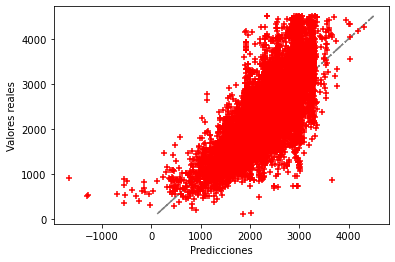

MSE: 239489.17275778993
                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     350.3
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        19:07:46   Log-Likelihood:            -1.2958e+05
No. Observations:               17023   AIC:                         2.593e+05
Df Residuals:                   16969   BIC:                         2.597e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const 

In [79]:
X_sm = new_data[feature_cols]
y_sm = new_data["price_usd_per_m2"]

X_sm = sm.add_constant(X_sm)

model = sm.OLS(y_sm, X_sm).fit()
predictions = model.predict(X_sm)


plt.plot(y_sm,y_sm, '-.', c='grey')
plt.scatter(predictions, y_sm, s=30, c=['r'], marker='+', zorder=10)
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()


print ("MSE:", mean_squared_error(y_sm, predictions))
print (model.summary())

<a id="overfitting"></a> 
## Overfitting

[volver a TOC](#toc)

El siguiente paso es chequear si nuestro modelo no tiene un problema de overfitting.

1) Lasso

In [80]:
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings("ignore")

lasso = LassoCV(alphas= [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                         0.05, 0.1, 1, 5, 10], normalize=False, cv=k, random_state=0)

#display(X_train_dos.shape, X_test_dos.shape, y_train_dos.shape, y_test_dos.shape)

lasso.fit(X_train_scdos, y_train_dos)

print(lasso.alpha_)
print(lasso.coef_)
print("R2 train Lasso: ", lasso.score(X_train_scdos,y_train_dos))
print("R2 test Lasso: ", lasso.score(X_test_scdos,y_test_dos))
print("R2 original: ",  metrics.r2_score(y_test_dos, y_pred_dos))

0.1
[   9.60714882  -59.93137632  -25.85902267  205.06440109  -48.79291609
  -53.06321939   65.99039934    0.59538821   36.58045324   44.53486882
  -31.23838038  -47.55769234  -36.72226208  -22.23955753  -35.93410141
  -16.06136291   -7.2662495   -19.23783949   93.55981787  246.36838481
  -24.63568459  -14.44418148   -4.38047126  -30.88879442  -10.53754219
   49.39415803  199.49726517   29.75890483   29.43367161  -35.11293026
   -3.03600681    9.57813734   -9.79752476   72.23970555   18.83987127
   11.5186276    -5.10789899  -54.11781114  -10.44691235    7.6077035
    3.61273376  -10.44672418   -6.94046941    0.          -18.63050246
   56.71532818   -6.31029064 -316.36114991  164.03980092   56.36269017
   94.71504751  128.73959068   33.38758804]
R2 train Lasso:  0.5263257203569265
R2 test Lasso:  0.5080812047408427
R2 original:  0.508000234591212


Si comparamos los R2 con Lasso y el original producto del modelo, no hay diferencias pronunciadas. Vemos algunos coeficientes que resultan en 0, pero no afectan la predicción.


2) Ridge

In [81]:
from sklearn import linear_model
model_ridge_cv = linear_model.RidgeCV(alphas= [0.0001,0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], 
                                   fit_intercept=True, normalize=False, cv=k)

model_fit_ridge_cv = model_ridge_cv.fit(X_train_scdos, y_train_dos)

print(model_fit_ridge_cv.alpha_)
print(model_fit_ridge_cv.coef_)
print('R2 train Ridge:', model_fit_ridge_cv.score(X_train_scdos,y_train_dos))
print('R2 test Ridge:', model_fit_ridge_cv.score(X_test_scdos,y_test_dos))
print('R2 Original:', metrics.r2_score(y_test_dos, y_pred_dos))

10.0
[   2.92635764  -66.90744403  -30.32197428  195.17033406  -52.25658014
  -57.74669229   56.0656626    -2.77106277   33.01252453   40.56146659
  -34.388453    -55.07315605  -41.03142647  -25.75589311  -39.93964327
  -20.21515995   -9.07718543  -20.47479469   88.26129798  235.00757443
  -26.52232173  -17.20558352   -5.48724057  -34.37870553  -13.1317833
   48.4461581   190.6399153    27.31368533   24.39231236  -38.87811673
   -7.42187577    1.95331568  -11.36473616   64.47838415   14.35303295
    7.81924598   -6.87710708  -56.95254185  -14.72537205    5.5745912
    0.98151044  -11.8440082    -7.57303466   -1.53043548  -19.3204825
   48.56708419   -7.75707724 -315.06597106  162.82197081   56.41275525
   94.69609327  128.84459726   33.52561966]
R2 train Ridge: 0.5263098887106084
R2 test Ridge: 0.5080666898168618
R2 Original: 0.508000234591212


Con Ridge tampoco vemos grandes diferencias en los R2. Disminuye levemente respecto al original. 

Siendo que ambos métodos nos devolvieron un R2 similar al predicho por el modelo, podemos pensar que no teníamos un problema de overfitting.

<a id="oportunidad"></a> 
## Oportunidades de compra

[volver a TOC](#toc)

Al momento de armar nuestro modelo de predicción, separamos en el Data Frame "sample" 100 muestras de la base. Vamos a ver si entre esas propiedades encontramos observciones para las cuales nuestro modelo prediga un valor mayor al real. Esto representaría una oportunidad de compra, siendo que cuentan con un valor de venta potencialmente mayor.

In [99]:
sample.head(12)

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1 operation property_type  \
97598        97598         97598           97598      sell     apartment   
46585        46585         46585           46585      sell     apartment   
56210        56210         56210           56210      sell     apartment   
31384        31384         31384           31384      sell     apartment   
72694        72694         72694           72694      sell     apartment   
85759        85759         85759           85759      sell     apartment   
5230          5230          5230            5230      sell     apartment   
116798      116798        116798          116798      sell     apartment   
116638      116638        116638          116638      sell     apartment   
64408        64408         64408           64408      sell     apartment   
64523        64523         64523           64523      sell         house   
74058        74058         74058           74058      sell     apartment   

           place_name                    place_with_parent_names country_name  \
97598   Villa Urquiza  |Argentina|Capital Federal|Villa Urquiza|    Argentina   
46585        Recoleta       |Argentina|Capital Federal|Recoleta|    Argentina   
56210         Palermo        |Argentina|Capital Federal|Palermo|    Argentina   
31384          Abasto         |Argentina|Capital Federal|Abasto|    Argentina   
72694    Barrio Norte   |Argentina|Capital Federal|Barrio Norte|    Argentina   
85759    Villa Crespo   |Argentina|Capital Federal|Villa Crespo|    Argentina   
5230         Floresta       |Argentina|Capital Federal|Floresta|    Argentina   
116798  Villa Urquiza  |Argentina|Capital Federal|Villa Urquiza|    Argentina   
116638      Caballito      |Argentina|Capital Federal|Caballito|    Argentina   
64408        Belgrano       |Argentina|Capital Federal|Belgrano|    Argentina   
64523      Colegiales     |Argentina|Capital Federal|Colegiales|    Argentina   
74058        Belgrano       |Argentina|Capital Federal|Belgrano|    Argentina   

             state_name  geonames_id  ... Villa Lugano  Villa Luro  \
97598   Capital Federal    3433775.0  ...            0           0   
46585   Capital Federal    3429595.0  ...            0           0   
56210   Capital Federal    3430234.0  ...            0           0   
31384   Capital Federal          NaN  ...            0           0   
72694   Capital Federal    3436109.0  ...            0           0   
85759   Capital Federal    3427458.0  ...            0           0   
5230    Capital Federal    3433910.0  ...            0           0   
116798  Capital Federal    3433775.0  ...            0           0   
116638  Capital Federal    3435874.0  ...            0           0   
64408   Capital Federal    3436077.0  ...            0           0   
64523   Capital Federal    3435356.0  ...            0           0   
74058   Capital Federal    3436077.0  ...            0           0   

        Villa Ortuzar  Villa Pueyrredón Villa Real  Villa Riachuelo  \
97598               0                 0          0                0   
46585               0                 0          0                0   
56210               0                 0          0                0   
31384               0                 0          0                0   
72694               0                 0          0                0   
85759               0                 0          0                0   
5230                0                 0          0                0   
116798              0                 0          0                0   
116638              0                 0          0                0   
64408               0                 0          0                0   
64523               0                 0          0                0   
74058               0                 0          0                0   

        Villa Santa Rita  Villa Soldati  Villa Urquiza  Vélez Sársfield  
97598                  0              0              1  

Predecimos los valores de precio por metro cuadrado para los 100 casos que nos guardamos en "sample".

In [83]:
X_sample = sample[feature_cols]
y_sample = sample["price_usd_per_m2"]

#X_sample_sc = scaler.transform(X_sample)
X_sample_sc = pd.DataFrame(scaler.transform(X_sample), index= X_sample.index.values, columns=X_sample.columns.values)
y_pred_sample = linreg.predict(X_sample_sc)
y_pred_sample = pd.DataFrame(y_pred_sample)

In [84]:
print(y_sample.shape)
print(y_pred_sample.shape)


(100,)
(100, 1)


In [85]:
y_sample_df = pd.DataFrame(y_sample)
y_sample_df.head()

price_usd_per_m2
97598       2416.666667
46585       3217.777778
56210       3157.894737
31384       2609.195402
72694       3318.181818

Tomando los DataFrame con los valores reales y con los valores predichos, armamos uno nuevo llamado "oportunidades".

In [86]:
oportunidades = pd.DataFrame()
oportunidades["Índice"] = y_sample_df.index

In [87]:
oportunidades["Precio_original"] = pd.DataFrame(y_sample_df.values)
oportunidades.head()

Índice  Precio_original
0   97598      2416.666667
1   46585      3217.777778
2   56210      3157.894737
3   31384      2609.195402
4   72694      3318.181818

In [88]:
oportunidades["Precio_potencial"] = pd.DataFrame(y_pred_sample.values)
oportunidades.head()

Índice  Precio_original  Precio_potencial
0   97598      2416.666667       2439.939442
1   46585      3217.777778       3014.594157
2   56210      3157.894737       3012.474206
3   31384      2609.195402       1903.716009
4   72694      3318.181818       2911.138818

Agregamos una columna llamada "diferencias", donde ponemos la diferencia de precios entre los valores reales y los predichos. 

In [89]:
oportunidades["Diferencia"] = oportunidades["Precio_potencial"] - oportunidades["Precio_original"]
oportunidades.head()

Índice  Precio_original  Precio_potencial  Diferencia
0   97598      2416.666667       2439.939442   23.272775
1   46585      3217.777778       3014.594157 -203.183621
2   56210      3157.894737       3012.474206 -145.420531
3   31384      2609.195402       1903.716009 -705.479393
4   72694      3318.181818       2911.138818 -407.043000

Los valores positivos, es decir, donde el valor predicho es mayor al original, representan una oportunidad de compra. Sin embargo, no olvidemos el RMSE: la diferencia de precio que podemos tener por error en el modelo. Para eso, vamos a quedarnos sólo con las propiedades que tengan una diferencia mayot al RMSE.

In [90]:
train_test_rmse(feature_cols, new_data)

MAE: 383.23400794902307
MSE: 243304.00397000922
RMSE: 493.25855691514283
R2: 0.519538334127065


El RMSE es de 493 USD.

In [91]:
mask_rmse = oportunidades["Diferencia"] >= 493

In [92]:
buenas_oportunidades = oportunidades[mask_rmse]
buenas_oportunidades.shape

(12, 4)

In [93]:
buenas_oportunidades.sort_values(by = "Diferencia", ascending = False).head(12)

Índice  Precio_original  Precio_potencial   Diferencia
15   35705      1969.696970       3008.696937  1038.999968
32   39722      1626.506024       2355.132311   728.626287
99   70403      1413.333333       2129.984693   716.651360
19   37870       969.696970       1667.809824   698.112854
93   39276      1156.250000       1845.117548   688.867548
42   10465      1395.348837       2060.647537   665.298700
72   10839      1549.180328       2193.928541   644.748213
90   18778      1301.587302       1933.419749   631.832447
91   44666      2439.930196       2999.092690   559.162494
5    85759      2010.869565       2564.972385   554.102820
12   42343      2416.666667       2960.241009   543.574343
44  116282      2500.000000       3040.023003   540.023003

Las 12 propiedades de arriba representarían las mejores oportunidades. Ordenadas de mayor a menor diferencia de precio, y tomando en cuenta el posible error del modelo (RMSE), encontramos la mejor oportunidad en la propiedad del índice 35705.

In [94]:
lista_oportunidades = [15, 19, 32, 99, 93, 42, 72, 90, 5, 91, 12, 44]

In [95]:
sample.iloc[lista_oportunidades][["price_usd_per_m2", "price_aprox_usd", "barrio", "cochera", "room_fixed", "seguridad", "antigüedad",\
                                 "property_type", "surface_total_in_m2", "surface_covered_in_m2" ]]

price_usd_per_m2  price_aprox_usd            barrio  cochera  \
35705        1969.696970        130000.00          Recoleta        0   
37870         969.696970        320000.00  Villa Del Parque        1   
39722        1626.506024        135000.00         Caballito        0   
70403        1413.333333        106000.00         San Telmo        0   
39276        1156.250000        185000.00     Villa Urquiza        0   
10465        1395.348837         60000.00          Barracas        0   
10839        1549.180328        189000.00         San Telmo        0   
18778        1301.587302         82000.00  Parque Patricios        0   
85759        2010.869565         92500.00      Villa Crespo        0   
44666        2439.930196        124436.44          Recoleta        0   
42343        2416.666667        145000.00           Palermo        0   
116282       2500.000000         65000.00           Palermo        0   

        room_fixed  seguridad  antigüedad property_type  surface_total_in_m2  \
35705          3.0          0       Usado     apartment                 66.0   
37870          6.0          0       Usado         house                330.0   
39722          3.0          0       Usado     apartment                 83.0   
70403          1.0          0  A Estrenar     apartment                 75.0   
39276          3.0          0       Usado            PH                160.0   
10465          2.0          0       Usado     apartment                 43.0   
10839          5.0          0       Usado     apartment                122.0   
18778          4.0          0       Usado     apartment                 63.0   
85759          1.0          0  A Estrenar     apartment                 46.0   
44666          2.0          0       Usado     apartment                 51.0   
42343          3.0          0       Usado     apartment                 60.0   
116282         NaN          0       Usado     apartment                 26.0   

        surface_covered_in_m2  
35705                    66.0  
37870                   230.0  
39722                    60.0  
70403                    37.0  
39276                   135.0  
10465                    43.0  
10839                   122.0  
18778                    66.0  
85759                    42.0  
44666                    42.0  
42343                    51.0  
116282                   26.0

<a id="conclusion"></a> 
## Conclusiones

[volver a TOC](#toc)


El modelo generado toma un total de 6 features para la predicción del precio por metro cuadrado:
- Superficie total de la propiedad
- Superficie cubierta de la propedad
- Barrio en el cuál está ubicada la propiedad
- Tipo de propiedad residencial (PH, departamento o casa)
- Si posee o no cochera
- Si posee o no seguridad

El modelo en un principio devolvió una predicción de 0.52 R2 y un error de 493 RMSE. Es decir, de cada 10 datos el modelo predijo 5 y cada predicción pudo haber tenido 493 USD de error en el precio. 

Para descartar un problema de overfitting, se verificó el modelo usando los métodos de Ridge y Lasso. A pesar de que algunas variables bajaron su coeficiente a 0 (o se acercaron a 0 en el caso de Ridge), el R2 casi no se modificó; terminó siendo 0.51. Esto nos indica que desde un inicio, no teníamos un problema de overfitting.

Finalmente, tomamos 100 propiedades que dejamos fuera del modelo, e hicimos la predicción de sus valores. Cuando la diferencia entre el valor predicho y el valor real supera el error del RMSE (el margen de error en el precio por metro cuadrado), estamos ante una oportunidad de compra; de comprar la propiedad a su precio real, según nuestro modelo, podríamos venderla a un valor mayor. Vimos los 12 casos donde se dio esta situación.



<a id="visualizaciones"></a> 
## Visualizaciones

[volver a TOC](#toc)


In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

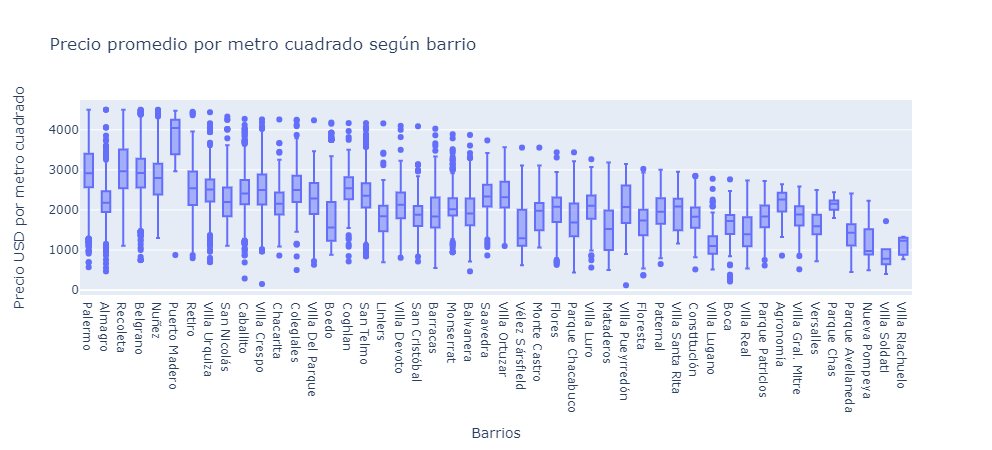

In [97]:
px.box(data_dummies.sort_values(by=['price_usd_per_m2'], ascending=False), x='barrio', 
       y='price_usd_per_m2', 
       #color='split_Zona',
       #hover_data=['operation'], 
       #color='categoria', 
       boxmode='overlay',
       title='Precio promedio por metro cuadrado según barrio',
       labels = {"price_usd_per_m2" :"Precio USD por metro cuadrado", "barrio":"Barrios"}
      )

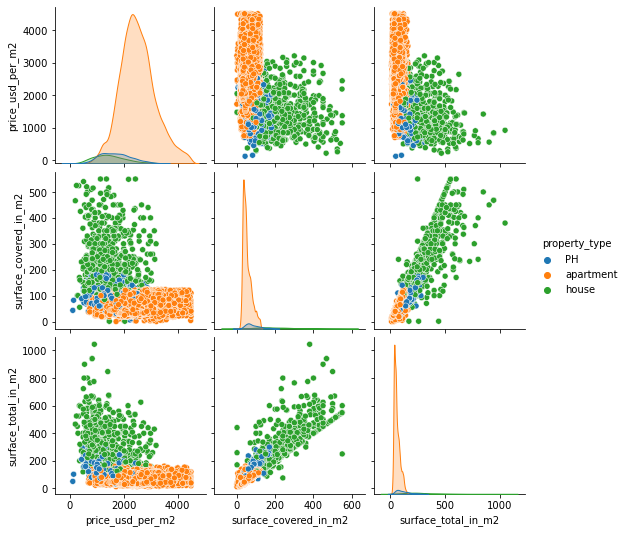

In [98]:
sns.pairplot(data=data_dummies[['price_usd_per_m2','surface_covered_in_m2','surface_total_in_m2','property_type']],
             hue='property_type')